#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')

In [33]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011.0,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011.0,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011.0,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011.0,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011.0,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,9850,RICK BURGER,PIPE WELDER,89916.75,6096.52,2070.00,NaN,98083.27,98083.27,2011.0,NaN,San Francisco,NaN
9850,9851,ERIC SHAFFER,REGISTERED NURSE,92149.82,1069.72,4858.68,NaN,98078.22,98078.22,2011.0,NaN,San Francisco,NaN
9851,9852,LEO BERNSTEIN,POLICE OFFICER I,84009.21,3027.23,11030.81,NaN,98067.25,98067.25,2011.0,NaN,San Francisco,NaN
9852,9853,TAMI QUAN,AIRPORT ELECTRICIAN,96050.44,90.77,1920.00,NaN,98061.21,98061.21,2011.0,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

### Question 1
Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [5]:
# no of rows and columns
df.shape

(9854, 13)

In [6]:
# datatypes of columns
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                float64
Notes               float64
Agency               object
Status              float64
dtype: object

In [14]:
# no of rows that has null values in every column
df.isna().sum()

Id                     0
EmployeeName           0
JobTitle               1
BasePay                1
OvertimePay            1
OtherPay               1
Benefits            9854
TotalPay               1
TotalPayBenefits       1
Year                   1
Notes               9854
Agency                 1
Status              9854
dtype: int64

### Question 2
Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [17]:
# Calculate statistical measures for TotalPay

mean_TotalPay = df['TotalPay'].mean()
median_TotalPay = df['TotalPay'].median()
mode_TotalPay = df['TotalPay'].mode()[0]  # mode() returns a Series, get the first value if you want a single mode
min_TotalPay = df['TotalPay'].min()
max_TotalPay = df['TotalPay'].max()
TotalPay_range = max_TotalPay - min_TotalPay
std_dev_TotalPay = df['TotalPay'].std()

### Question 3
Data Cleaning: Handle missing data by suitable method with explain why you use it.

In [19]:
# Check for missing data
missing_data = df.isna().sum()
print(missing_data)

Id                     0
EmployeeName           0
JobTitle               1
BasePay                1
OvertimePay            1
OtherPay               1
Benefits            9854
TotalPay               1
TotalPayBenefits       1
Year                   1
Notes               9854
Agency                 1
Status              9854
dtype: int64


In [24]:
# If TotalPay column has missing values, we can decide to fill them with the median salary
# median imputation was used because salaries can have a wide range and might not be normally distributed
# removing the missing data can also be a solution but this only applies when the dataframe is large

df['TotalPay'].fillna(df['TotalPay'].median(), inplace=True)
df['BasePay'].fillna(df['BasePay'].median(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].median(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].median(), inplace=True)
df['TotalPayBenefits'].fillna(df['TotalPayBenefits'].median(), inplace=True)

In [25]:
# Check for missing data
missing_data = df.isna().sum()
print(missing_data)

Id                     0
EmployeeName           0
JobTitle               1
BasePay                0
OvertimePay            0
OtherPay               0
Benefits            9854
TotalPay               0
TotalPayBenefits       0
Year                   1
Notes               9854
Agency                 1
Status              9854
dtype: int64


### Question 4
Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

In [26]:
import matplotlib.pyplot as plt

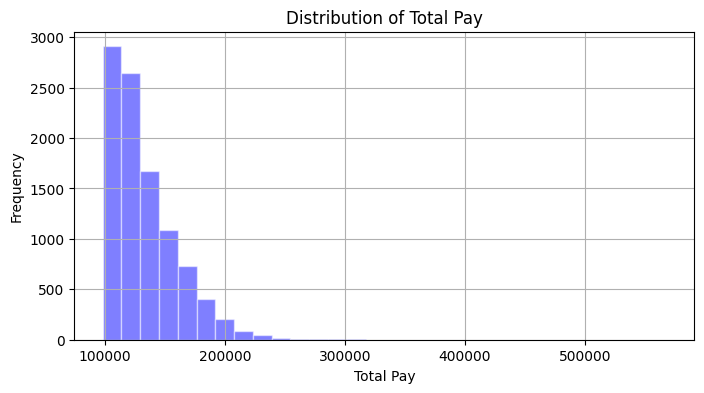

In [64]:
# Histogram of TotalPay
plt.figure(figsize=(8, 4))
plt.hist(df['TotalPay'], bins=30, alpha=0.5, edgecolor='w', color='blue')
plt.grid(True)
plt.title('Distribution of Total Pay')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

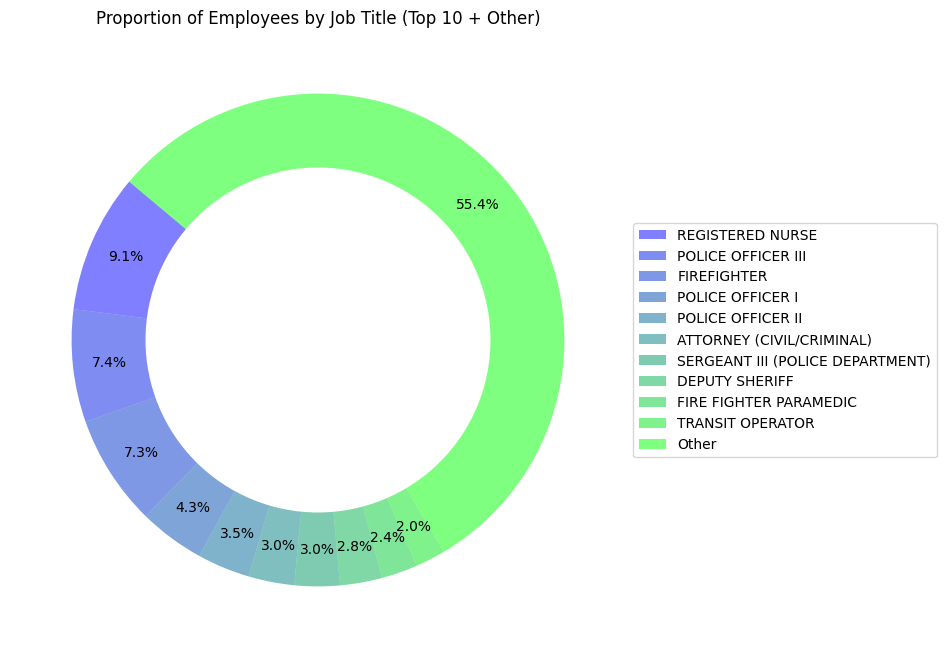

In [66]:
# Count the number of employees in every department based on job title
JobTitle_counts = df['JobTitle'].value_counts()

# to select top 10 designations
top_10_jobs = JobTitle_counts[:10]
other_sum = JobTitle_counts[10:].sum()
top_10_jobs['Other'] = other_sum

# Pie chart of designation
colors = [
    (0, 0, 1, 0.5),  # RGBA for blue with alpha=0.5
    (0, 0.1, 0.9, 0.5),
    (0, 0.2, 0.8, 0.5),
    (0, 0.3, 0.7, 0.5),
    (0, 0.4, 0.6, 0.5),
    (0, 0.5, 0.5, 0.5),
    (0, 0.6, 0.4, 0.5),
    (0, 0.7, 0.3, 0.5),
    (0, 0.8, 0.2, 0.5),
    (0, 0.9, 0.1, 0.5),
    (0, 1, 0, 0.5)
]
plt.figure(figsize=(10, 8))
pie_wedges = plt.pie(top_10_jobs, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(pie_wedges[0], top_10_jobs.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Proportion of Employees by Job Title (Top 10 + Other)')
plt.show()


### Question 5
Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [50]:
grouped_data = df.groupby(['JobTitle'])
summary_stats = grouped_data['TotalPay'].describe()
print(summary_stats)

                                        count           mean           std  \
JobTitle                                                                     
ADMINISTRATIVE ENGINEER                   9.0  131975.663333   8462.154019   
ADMINISTRATOR, SFGH MEDICAL CENTER        1.0  257124.440000           NaN   
AIRPORT COMMUNICATIONS OPERATOR           3.0  103549.066667   2853.158941   
AIRPORT ECONOMIC PLANNER                 13.0  108264.821538   4006.255461   
AIRPORT ELECTRICIAN                      17.0  108707.828235   6144.361579   
...                                       ...            ...           ...   
WATER OPERATIONS ANALYST                 10.0  109903.610000   5626.721025   
WATER SERVICE INSPECTOR                   3.0  113730.993333   6697.121894   
WELDER                                    4.0  118607.265000   8265.261511   
WIRE ROPE CABLE MAINTENANCE MECHANIC      7.0  152432.062857  80963.080055   
WIRE ROPE CABLE MAINTENANCE SUPERVISOR    1.0  199628.970000    

In [60]:
# Calculate the average TotalPay for each group
average_totalpay = grouped_data['TotalPay'].mean()

# Sort the groups by average TotalPay for better comparison
sorted_average_totalpay = pd.DataFrame(average_totalpay.sort_values(ascending=False))
sorted_average_totalpay

,TotalPay
JobTitle,
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
DEPUTY DIRECTOR OF INVESTMENTS,307899.460000
"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.730000
"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",279359.560000
EXECUTIVE CONTRACT EMPLOYEE,277438.840000
...,...
ASSISTANT FORENSIC TOXICOLOGIST I,98544.676000
PLANNER III-ENVIRONMENTAL REVIEW,98477.993333
FARE INSPECTIONS SUPERVISOR/INVESTIGATOR,98331.030000


In [52]:
type(sorted_average_totalpay)

pandas.core.series.Series

### Question 6
Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [61]:
correlation = df['TotalPay'].corr(df['OvertimePay'])
print(f'Correlation between TotalPay and OvertimePay: {correlation}')

Correlation between TotalPay and OvertimePay: 0.3843270849566349


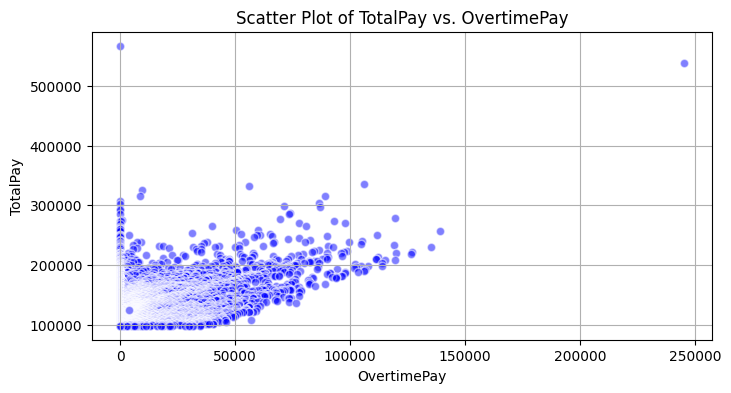

In [63]:
plt.figure(figsize=(8, 4))
plt.scatter(df['OvertimePay'], df['TotalPay'], alpha=0.5, edgecolor='w', color='blue')
plt.title('Scatter Plot of TotalPay vs. OvertimePay')
plt.xlabel('OvertimePay')
plt.ylabel('TotalPay')
plt.grid(True)
plt.show()

### Question 7
Summary of Insights: Write a brief report summarizing the findings and insights from the analyses.

From the analysis above few points has been noticed:

*   'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY' Position has the highest paid salary with average of	399211.275.
*   PIPE WELDER	Position has the lowest paid salary with average of 98083.27.
* There are 473 positions in this file.
* 'Registered Nurse' position is more common job in this dataset.
* Benefits, status, notes columns are empty columns and have not been used.

